In [4]:
# Validation

/var/folders/nf/tk1_dsm923q946nd2xz6z6g0nv_859/T/ipykernel_65130/2241523855.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(data_frames))


[84.54756992 74.25043332 58.14999607 41.84229796 27.75344675 16.54286606
  8.01180342  2.81849752  5.40297915  9.35850688 12.72356418 15.52380264
 17.86390746 19.83457798 21.50727728 22.93758809 24.16898133 25.23570383
 26.16500283 26.9787455 ]


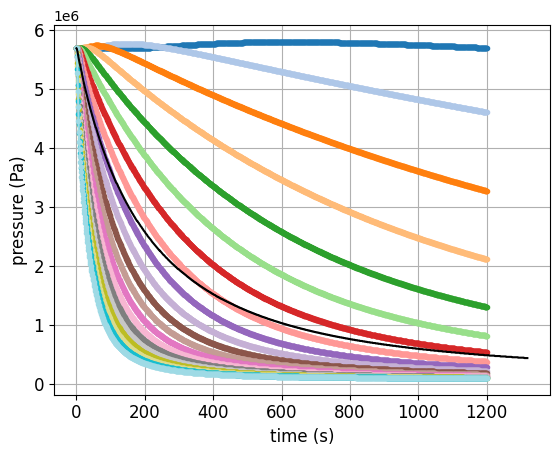

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create an empty dictionary to store the DataFrame 
data_frames = {} 
NARMSE = np.array([])
data20 = pd.read_csv('experimental_data.csv')

 
# Loop through numbers
for i in range(0, 20):
    filename = f'stochastic_tools_out_runner{i:02d}.csv'
    data_frames[f'data{i}'] = pd.read_csv(filename)
  
# Function to compute Absolute Root Mean Square Error (ARMSE)
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

color_palette = plt.cm.get_cmap('tab20', len(data_frames))

# Plot the data for each DataFrame with different line colors
for idx, (key, df) in enumerate(data_frames.items()):
    plt.plot(df['time'], df['inlet-p'], '.', color=color_palette(idx), label=f'Data for {key}', linestyle='-')
    # Compute the error between the plot and experimental data
    x_values = df['time']
    y_values = df['inlet-p']
    experimental_y_values = np.interp(x_values, data20['Time4'], data20['P_4'])
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    armse = compute_armse(y_values, experimental_y_values)/1e6
    # Append the value to the NumPy array
    NARMSE = np.append(NARMSE, narmse) 

 
print(NARMSE)


plt.plot(data20['Time4'], data20['P_4'], color='k', label = 'experimental results')
plt.xlabel('time (s)', fontsize = 12)
plt.ylabel('pressure (Pa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
# plt.legend(fontsize = 12)
plt.grid()


    particle_diameter_1
0                   1.0
1                   2.0
2                   3.0
3                   4.0
4                   5.0
5                   6.0
6                   7.0
7                   8.0
8                   9.0
9                  10.0
10                 11.0
11                 12.0
12                 13.0
13                 14.0
14                 15.0
15                 16.0
16                 17.0
17                 18.0
18                 19.0
19                 20.0


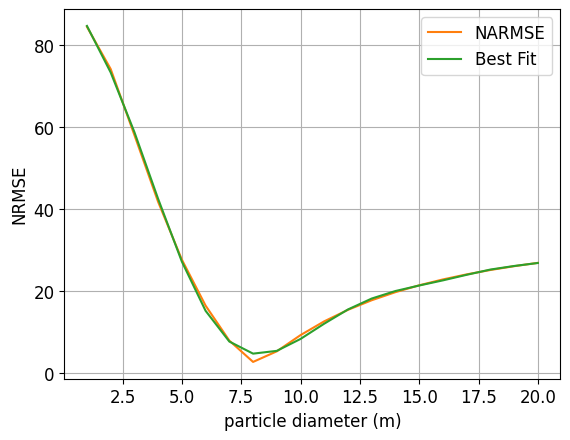

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

particle_diameter_1 = pd.read_csv('parameters.csv')*1e6
print(particle_diameter_1)

degree = 8 # Degree of the polynomial
coefficients = np.polyfit(particle_diameter_1['particle_diameter_1'], NARMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(particle_diameter_1['particle_diameter_1'])

plt.plot(particle_diameter_1['particle_diameter_1'], NARMSE, color='C1', label = 'NARMSE')
plt.plot(particle_diameter_1['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('particle diameter (m)', fontsize = 12)
plt.ylabel('NRMSE', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()

2.9192836918919136


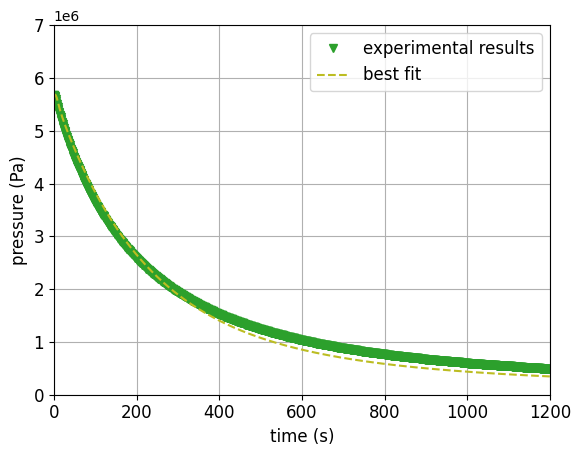

In [7]:
import pandas as pd
import numpy as np

best_fit = pd.read_csv('model_pellets_out.csv')
x_values = best_fit['time']
y_values = best_fit['inlet-p']
experimental_y_values = np.interp(x_values, data20['Time4'], data20['P_4'])
range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
armse = compute_armse(y_values, experimental_y_values)/1e6
print(narmse)


plt.plot(data20['Time4'], data20['P_4'], 'v', color='tab:green' , label = 'experimental results')
plt.plot(best_fit['time'], best_fit['inlet-p'], linestyle = '--', color='tab:olive', label = 'best fit')
plt.xlabel('time (s)', fontsize = 12)
plt.xlim(0,1200)
plt.ylim(0, 7000000) 
plt.ylabel('pressure (Pa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12) 
plt.grid()